<a href="https://colab.research.google.com/github/mmeierer/CNN---TensorFlow-vs-PyTorch/blob/main/cnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using an CNN with PyTorch

## 1. Import & Processing

### a) Importing modules

In [1]:
# Load required packages - data handling & plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load required packages - deep learning 
import torch
import torch.nn as nn
import torch.optim as optim

### b) Importing data

In [2]:
train_data = pd.read_csv('https://github.com/mmeierer/CNN---TensorFlow-vs-PyTorch/blob/main/fashion-mnist_train.csv?raw=true')
test_data = pd.read_csv('https://github.com/mmeierer/CNN---TensorFlow-vs-PyTorch/blob/main/fashion-mnist_test.csv?raw=true')

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [4]:
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0]
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0]

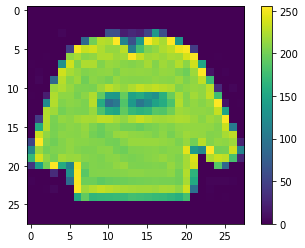

In [5]:
plt.figure()
plt.imshow(train_images.values[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

### c) Data preparation

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images = train_images / np.float32(255)
test_images = test_images / np.float32(255)

In [9]:
train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,0.000000,0.411765,0.360784,0.396078,0.419608,0.392157,0.517647,0.000000,0.000000,0.007843,0.015686,0.0,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.588235,0.890196,...,0.827451,0.862745,0.839216,0.290196,0.000000,1.000000,0.870588,0.501961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172549,0.047059,0.0,0.0,0.156863,0.525490,0.635294,0.749020,0.839216,0.639216,0.572549,0.647059,0.309804,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,0.447059,0.717647,0.439216,0.215686,0.090196,0.282353,0.400000,0.647059,0.627451,0.109804,0.000000,0.0,0.000000,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.094118,0.737255,0.639216,0.364706,0.533333,...,0.670588,0.976471,0.811765,0.772549,0.792157,0.176471,0.000000,0.011765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.0,0.0,0.000000,0.086275,0.082353,0.098039,0.270588,0.203922,0.176471,0.290196,0.152941,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.180392,0.000000,0.082353,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.098039,0.733333,0.741176,0.000000,...,0.901961,0.929412,0.898039,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.266667,0.454902,0.439216,0.533333,0.576471,0.564706,0.474510,0.400000,0.247059,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## 2. Model specific data preparation

### a) Load the data

In [10]:
x_train_pt = torch.from_numpy(train_images.values.reshape((-1, 1, 28, 28)))
y_train_pt = torch.from_numpy(train_labels.values)
x_test_pt = torch.from_numpy(test_images.values.reshape((-1, 1, 28, 28)))
y_test_pt = torch.from_numpy(test_labels.values)

### b) Tensor view of the data

In [11]:
x_train_pt.shape

torch.Size([60000, 1, 28, 28])

In [12]:
x_train_pt[0][0][5]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1843, 0.9882, 0.9176, 0.9333,
        0.8784, 0.8431, 0.8431, 0.8980, 0.4235, 0.7059, 0.8118, 0.8392, 0.8784,
        0.9059, 0.9765, 0.9961, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [13]:
y_train_pt[0]

tensor(2)

## 3. Model definition

### a) Sequentially add layers

In [14]:
def weights_init(m):
  if isinstance(m, nn.Linear):
      nn.init.uniform_(m.weight.data, -1,1)
      nn.init.zeros_(m.bias.data)
  if isinstance(m, nn.Conv2d):
      nn.init.zeros_(m.bias.data)

In [15]:
model_pt = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(16*5*5,120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84, 10))

In [16]:
model_pt.apply(weights_init)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
print(model_pt)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)


### c) Inspect the first convolutional layer

In [18]:
model_pt[0].weight[0]

tensor([[[-0.0230, -0.0924, -0.1852,  0.0580,  0.1053],
         [-0.0828,  0.0927, -0.0304,  0.0350, -0.1747],
         [ 0.0883,  0.1826, -0.0881,  0.1681,  0.0954],
         [-0.1688, -0.1930, -0.1835,  0.1335,  0.0639],
         [-0.1287, -0.0538, -0.1435,  0.1400, -0.0378]]],
       grad_fn=<SelectBackward>)

In [19]:
model_pt[0].weight.shape

torch.Size([6, 1, 5, 5])

In [20]:
model_pt[0].bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0.], requires_grad=True)

In [21]:
model_pt[0].bias.shape

torch.Size([6])

## 4. Loss & Optimizer

In [22]:
optimizer_pt = optim.Adam(model_pt.parameters(), lr=0.01, betas=(0.9, 0.999))
loss_fn_pt = nn.CrossEntropyLoss()

## 5. Training

### a) Training loop

In [23]:
def get_correct(y_pred,labels):
  _, predicted = torch.max(y_pred.data, 1)
  return predicted.eq(labels.data).sum().item()

In [24]:
def train_step_pt(model, optimizer, loss_fn, batch_size=10):
  model.train()
  train_correct = 0
  total_loss = 0.0
  batch = 0
  for beg_i in range(0, x_train_pt.size(0), batch_size):
        x_train_batch_pt = x_train_pt[beg_i:beg_i + batch_size]
        y_train_batch_pt = y_train_pt[beg_i:beg_i + batch_size]

        optimizer.zero_grad()
        y_pred_pt = model(x_train_batch_pt)
        
        loss = loss_fn(y_pred_pt,y_train_batch_pt)

        loss.backward()
        optimizer.step()
        
        train_correct += get_correct(y_pred_pt,y_train_batch_pt)
        total_loss += np.sum(loss.data.numpy())
        batch += 1
  return total_loss/batch, train_correct/x_train_pt.size(0)

In [25]:
def test_step_pt(model, optimizer, loss_fn, batch_size=10):
  test_correct = 0
  total_loss = 0.0
  batch = 0
  for beg_i in range(0, x_test_pt.size(0), batch_size):
        x_test_batch_pt = x_test_pt[beg_i:beg_i + batch_size]
        y_test_batch_pt = y_test_pt[beg_i:beg_i + batch_size]

        y_pred_pt = model(x_test_batch_pt)

        loss = loss_fn(y_pred_pt,y_test_batch_pt)

        test_correct += get_correct(y_pred_pt,y_test_batch_pt)
        total_loss += np.sum(loss.data.numpy())
        batch += 1

  return total_loss/batch, test_correct/x_test_pt.size(0)

In [ ]:
train_loss_pt = []
test_loss_pt = []

train_acc_pt = []
test_acc_pt = []

epochs = 25

for epoch in range(epochs):
  train_loss,train_acc = train_step_pt(model_pt,optimizer_pt,loss_fn_pt)
  train_loss_pt.append(train_loss)
  train_acc_pt.append(train_acc*100)

  test_loss,test_acc = test_step_pt(model_pt,optimizer_pt,loss_fn_pt)
  test_loss_pt.append(test_loss)
  test_acc_pt.append(test_acc*100)

  template = ("Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, "
              "Test Accuracy: {}")
  print (template.format(epoch+1, train_loss,
                         train_acc*100, test_loss,
                         test_acc*100))

Epoch 1, Loss: 0.8070274124769494, Accuracy: 69.37833333333333, Test Loss: 0.5962864841111004, Test Accuracy: 80.57
Epoch 2, Loss: 0.4807887786132439, Accuracy: 83.15666666666667, Test Loss: 0.4318063776898198, Test Accuracy: 85.22999999999999
Epoch 3, Loss: 0.4212707319057857, Accuracy: 85.56, Test Loss: 0.37380226935073735, Test Accuracy: 86.86


In [ ]:
plt.figure(figsize=(16,10))
plt.plot(train_acc_pt)
plt.plot(test_acc_pt)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

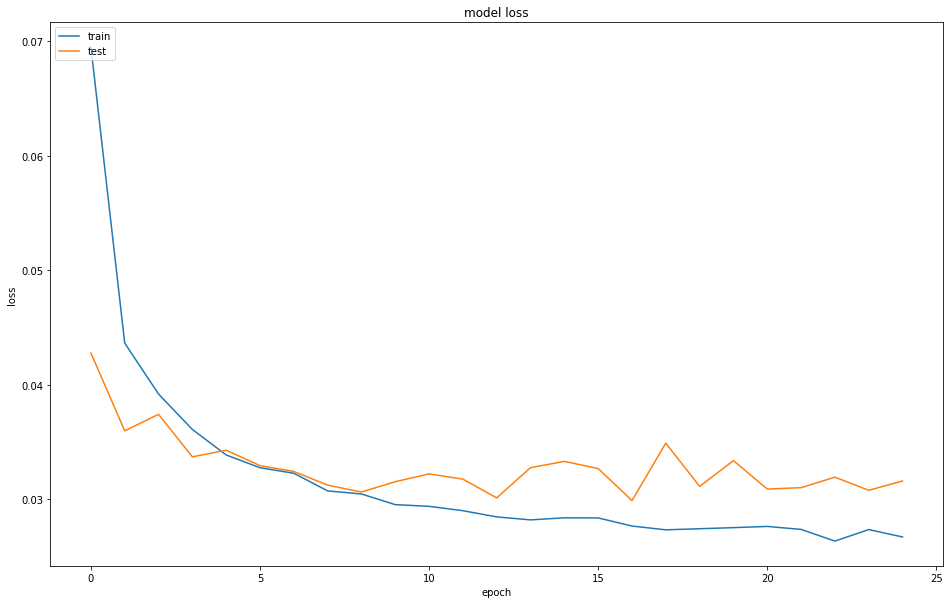

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(train_loss_pt)
plt.plot(test_loss_pt)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### b) Training progress

### c) Inspect the first conv. layer after training

In [ ]:
model_pt[0].weight[0]

tensor([[[-0.1428, -0.1145,  0.1149, -0.0514, -0.1791],
         [ 0.0335,  0.0830, -0.2078,  0.0955, -0.0995],
         [-0.0538, -0.1193,  0.0949, -0.0164, -0.2264],
         [ 0.0302, -0.0029, -0.0853, -0.0821, -0.0952],
         [-0.0706,  0.0170, -0.2019,  0.1007, -0.0619]]],
       grad_fn=<SelectBackward>)

In [ ]:
model_pt[0].bias

Parameter containing:
tensor([-0.2012, -0.2770,  0.3050, -0.2033, -0.9468, -0.1999],
       requires_grad=True)

## 6. Evaluation

In [ ]:
correct = 0
outputs = model_pt(x_test_pt)
_, predicted = torch.max(outputs.data, 1)
correct += float((predicted == y_test_pt).sum())
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % ((correct/len(x_test_pt))*100))

Test Accuracy of the model on the 10000 test images: 89.1800 %
